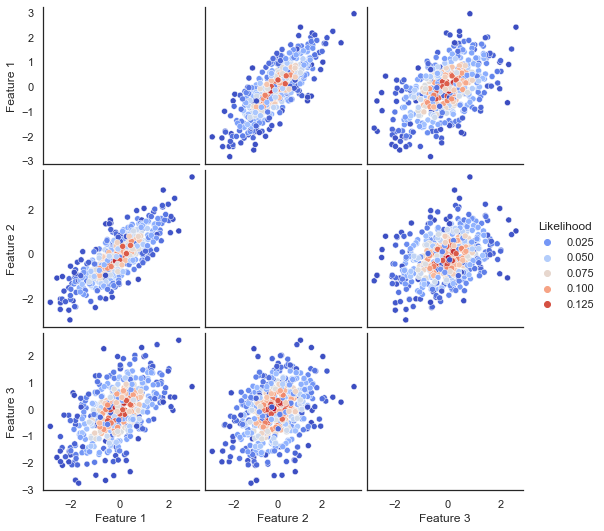

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd

# Generate a synthetic dataset with 3 features
np.random.seed(42)
mean = [0, 0, 0]
cov = [[1, 0.8, 0.6],
       [0.8, 1, 0.4],
       [0.6, 0.4, 1]]
data = np.random.multivariate_normal(mean, cov, size=500)

# Fit a multivariate Gaussian distribution to the data
fitted_mean = np.mean(data, axis=0)
fitted_cov = np.cov(data.T)

# Create a multivariate normal object using the fitted parameters
fitted_distribution = multivariate_normal(mean=fitted_mean, cov=fitted_cov)

# Calculate the likelihood of each data point given the fitted distribution
likelihoods = fitted_distribution.pdf(data)

# Add the likelihoods as a new column to the data
data_with_likelihoods = np.column_stack((data, likelihoods))

# Visualize the high-dimensional distribution using a pairplot
sns.set(style="white")
columns = ["Feature 1", "Feature 2", "Feature 3", "Likelihood"]
sns.pairplot(pd.DataFrame(data_with_likelihoods, columns=columns), diag_kind="kde", hue="Likelihood", palette="coolwarm")
#plt.savefig('new GMM likelihood')
plt.show()

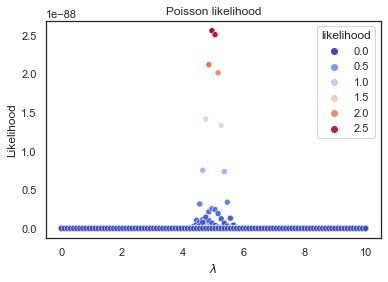

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson
import pandas as pd

# Generate synthetic datasets
np.random.seed(42)
num_datasets = 100
lambda_value = 5  # Set the fixed lambda value
poisson_datasets = [np.random.poisson(lambda_value, 100) for _ in range(num_datasets)]
#print(poisson_datasets)
# Likelihood function for the Poisson distribution
def likelihood_poisson(data, lam):
    return np.prod(poisson.pmf(data, lam))

# Calculate the likelihoods for a range of lambda values
lambda_values = np.linspace(0, 10, num_datasets)
likelihoods = [likelihood_poisson(data, lam) for data in poisson_datasets for lam in lambda_values]

# Prepare the data for visualization
data_for_viz = pd.DataFrame({'lambda': np.tile(lambda_values, num_datasets), 'likelihood': likelihoods})

# Visualize the high-dimensional probability distribution using a scatterplot
sns.scatterplot(data=data_for_viz, x='lambda', y='likelihood', hue='likelihood', palette='coolwarm')

plt.xlabel("$\lambda$")
plt.ylabel("Likelihood")
plt.title("Poisson likelihood")
plt.savefig('poisson likelihood')
plt.show()

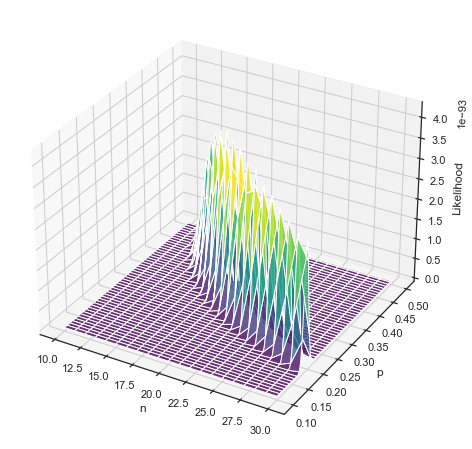

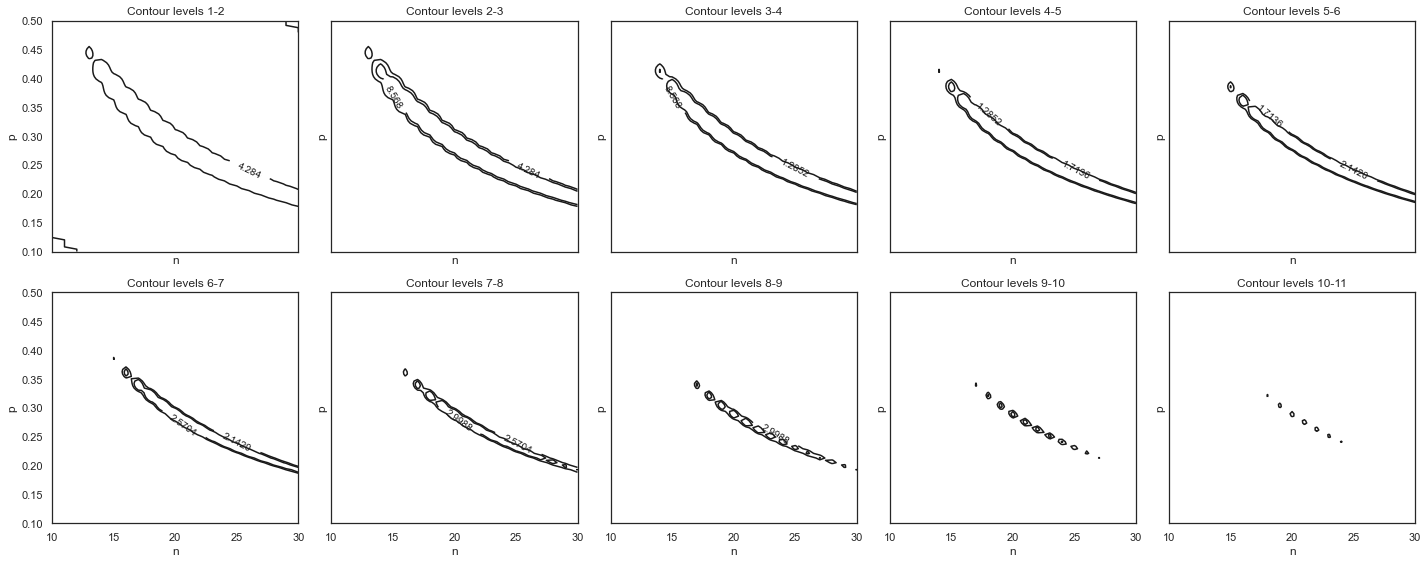

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import binom

# Generate synthetic data from a Binomial distribution with fixed n and p values
np.random.seed(42)
true_n = 20
true_p = 0.3
num_samples = 100
data = np.random.binomial(true_n, true_p, num_samples)

# Likelihood function for the Binomial distribution
def likelihood_binom(data, n, p):
    return np.prod(binom.pmf(data, n, p))

# Define the range of n and p values for likelihood calculation
n_values = np.arange(10, 31)
p_values = np.linspace(0.1, 0.5, 100)

# Calculate the likelihood for each combination of n and p values
likelihoods = np.array([[likelihood_binom(data, n, p) for p in p_values] for n in n_values])

# Create a meshgrid for 3D plotting
n_grid, p_grid = np.meshgrid(n_values, p_values, indexing='ij')

# Prepare the data for visualization
data_for_viz = pd.DataFrame({'n': n_grid.ravel(), 'p': p_grid.ravel(), 'likelihood': likelihoods.ravel()})

# Create a figure with a custom figsize (width, height)
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(n_grid, p_grid, likelihoods, cmap='viridis', alpha=0.8)
ax.set_xlabel('n')
ax.set_ylabel('p')
ax.set_zlabel('Likelihood')
plt.savefig('binomial likelihood')
plt.show()

# Define contour levels for the 2D plots
contour_levels = np.linspace(np.min(likelihoods), np.max(likelihoods), 11)

# Create a series of 2D contour plots
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.ravel()

for i, ax in enumerate(axes):
    cs = ax.contour(n_values, p_values, likelihoods.T, levels=contour_levels[i:i+2], colors='k', linestyles='solid')
    ax.clabel(cs, inline=True, fontsize=10)
    ax.set_title(f'Contour levels {i+1}-{i+2}')
    ax.set_xlabel('n')
    ax.set_ylabel('p')

plt.tight_layout()
plt.savefig('binomial likelihood contour')
plt.show()

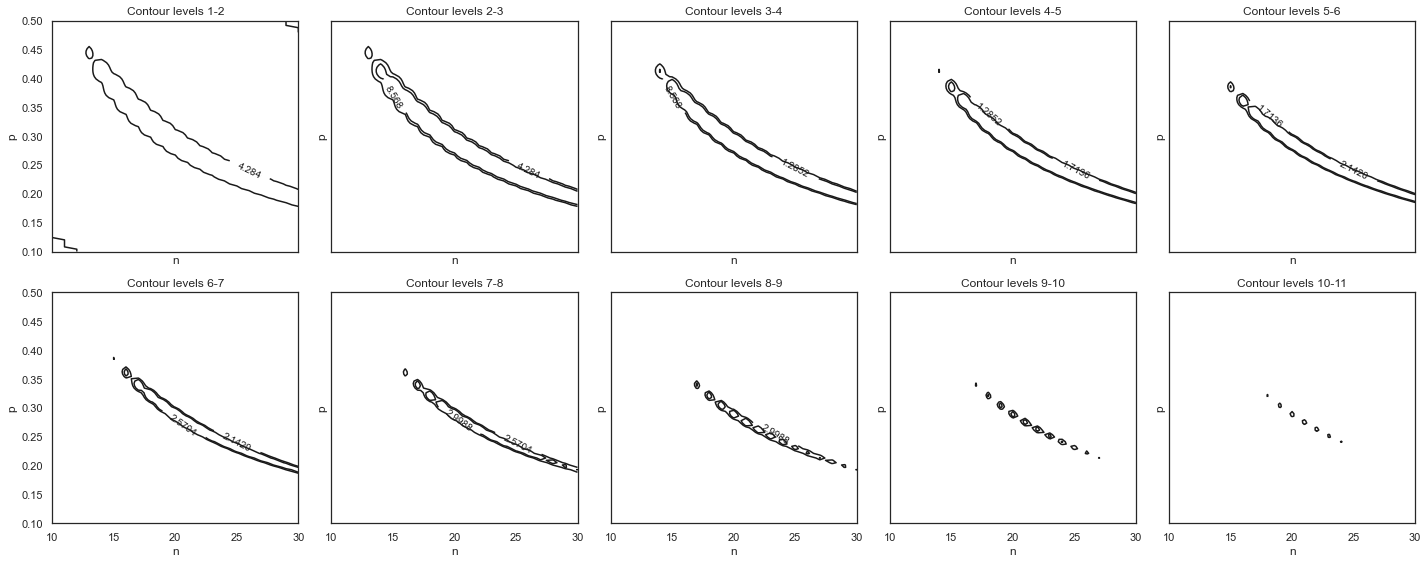

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom

# Generate synthetic data from a Binomial distribution with fixed n and p values
np.random.seed(42)
true_n = 20
true_p = 0.3
num_samples = 100
data = np.random.binomial(true_n, true_p, num_samples)

# Likelihood function for the Binomial distribution
def likelihood_binom(data, n, p):
    return np.prod(binom.pmf(data, n, p))

# Define the range of n and p values for likelihood calculation
n_values = np.arange(10, 31)
p_values = np.linspace(0.1, 0.5, 100)

# Calculate the likelihood for each combination of n and p values
likelihoods = np.array([[likelihood_binom(data, n, p) for p in p_values] for n in n_values])

# Define contour levels for the 2D plots
contour_levels = np.linspace(np.min(likelihoods), np.max(likelihoods), 11)

# Create a series of 2D contour plots
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.ravel()

for i, ax in enumerate(axes):
    cs = ax.contour(n_values, p_values, likelihoods.T, levels=contour_levels[i:i+2], colors='k', linestyles='solid')
    ax.clabel(cs, inline=True, fontsize=10)
    ax.set_title(f'Contour levels {i+1}-{i+2}')
    ax.set_xlabel('n')
    ax.set_ylabel('p')

plt.tight_layout()
plt.show()
